In [3]:
import os
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import imageio
import random
df = pd.read_csv('players_21.csv')

In [4]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [5]:
leagues = ['English Premier League', 'Spain Primera Division', 'Italian Serie A' ,'German 1. Bundesliga', 'French Ligue 1']
df = df[df['league_name'].isin(leagues)]

In [6]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18670,253041,https://sofifa.com/player/253041/jean-lambert-...,J. Evan's Allan,Jean Lambert Evan's Allan,21,1998-12-17,180,70,France,Crotone,...,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2
18757,251674,https://sofifa.com/player/251674/jean-belehoua...,J. Belehouan,Jean Belehouan,19,2000-09-01,190,76,France,Sheffield United,...,47+2,43+2,43+2,43+2,47+2,48+2,46+2,46+2,46+2,48+2
18786,252450,https://sofifa.com/player/252450/harry-boyes/2...,H. Boyes,Harry Boyes,22,1998-06-16,178,73,England,Sheffield United,...,48+2,44+2,44+2,44+2,48+2,48+2,45+2,45+2,45+2,48+2
18836,252466,https://sofifa.com/player/252466/devid-eugene-...,D. Bouah,Devid Eugene Bouah,18,2001-08-13,177,74,Italy,Roma,...,47+2,42+2,42+2,42+2,47+2,47+2,47+2,47+2,47+2,47+2


In [7]:
df['dob']= pd.to_datetime(df['dob'])
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['day'] = pd.DatetimeIndex(df['dob']).day
df['dayofweek'] = pd.DatetimeIndex(df['dob']).weekday

/home/ahmdsroor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ahmdsroor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ahmdsroor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

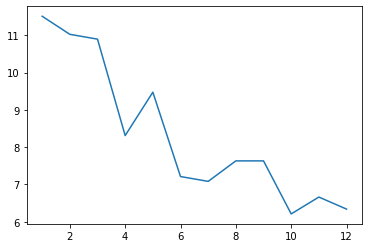

In [8]:
(df['month'].value_counts(normalize=True)*100).sort_index().plot()

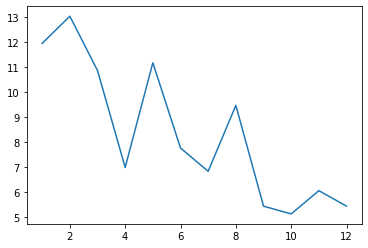

In [9]:
(df[df['league_name']=='Italian Serie A']['month'].value_counts(normalize=True)*100).sort_index().plot()

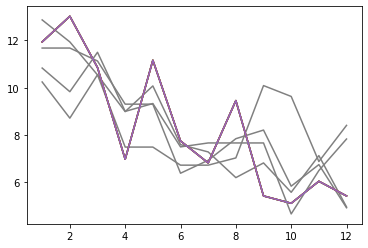

In [10]:
for league in leagues:
  (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
  (df[df['league_name']=='Italian Serie A']['month'].value_counts(normalize=True)*100).sort_index().plot()

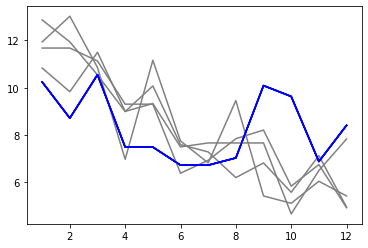

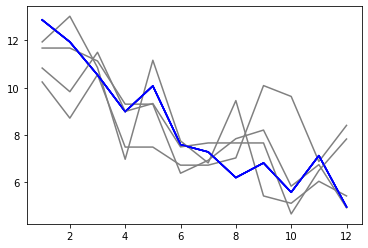

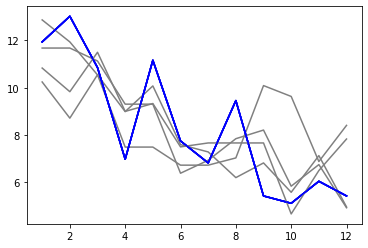

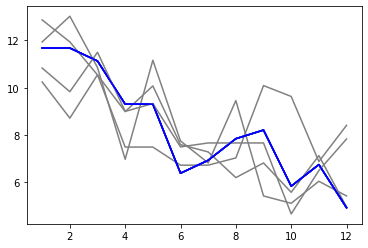

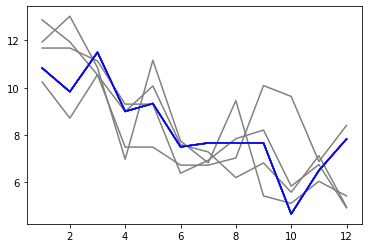

In [11]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'blue')

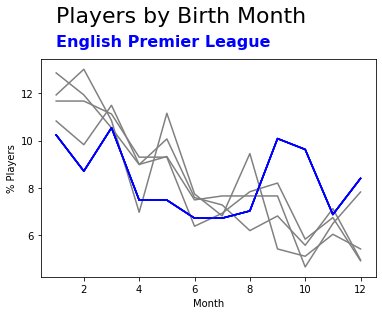

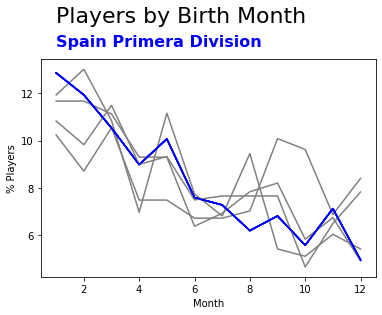

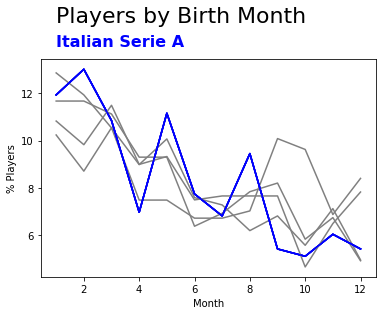

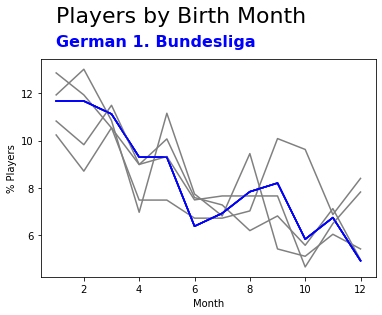

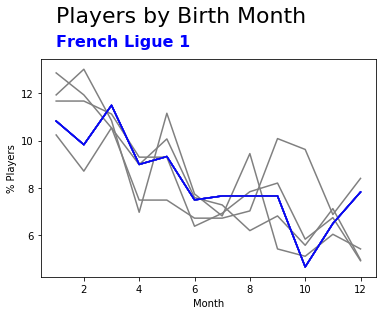

In [12]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'blue')
  plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
  plt.text(1,14,league, fontsize=16, color='blue', fontweight=600)
  plt.xlabel('Month')
  plt.ylabel('% Players')

In [13]:
def return_random_hex():
  r = lambda: random.randint(0,255)
  return('#%02X%02X%02X' % (r(),r(),r()))

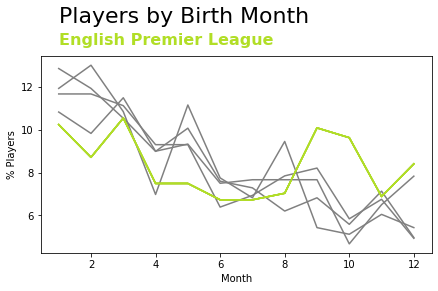

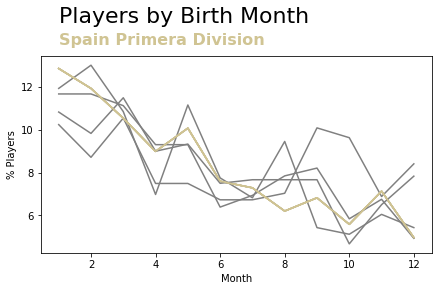

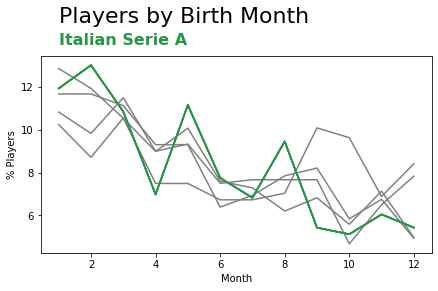

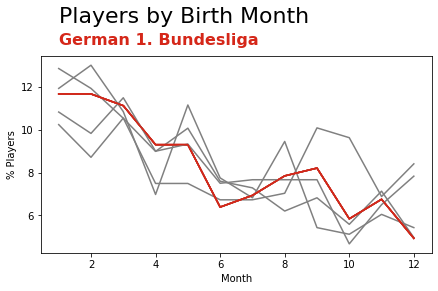

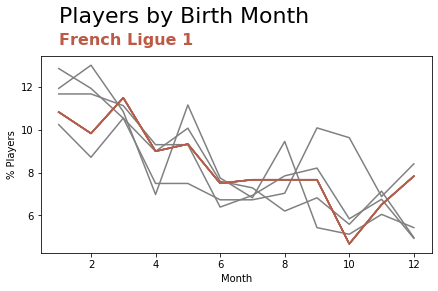

In [15]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  col = return_random_hex()
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = col)
  plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
  plt.text(1,14,league, fontsize=16, color=col, fontweight=600)
  plt.tight_layout()
  plt.xlabel('Month')
  plt.ylabel('% Players')

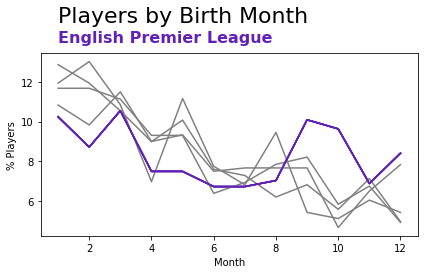

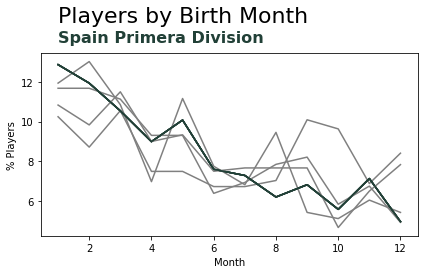

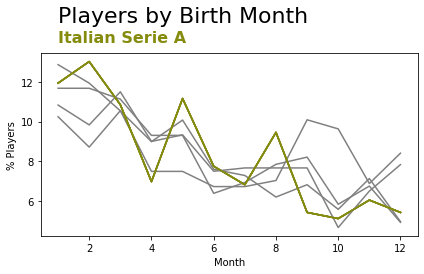

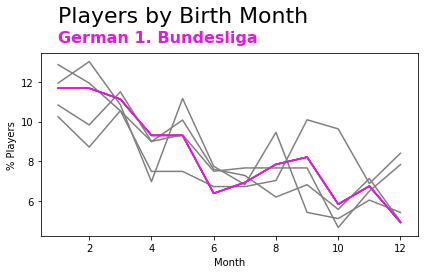

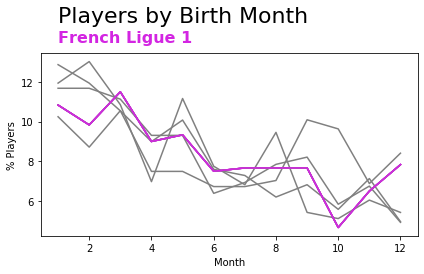

In [23]:
for index,league in enumerate(leagues):
  fig, ax = plt.subplots(nrows=1, ncols=1)   
  col = return_random_hex()
  for league2 in leagues:     
      (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
      (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = col)
  plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
  plt.text(1,14,league, fontsize=16, color=col, fontweight=600)
  plt.xlabel('Month')
  plt.ylabel('% Players')
  plt.tight_layout()
  plt.savefig(str(index) + '.png')

In [24]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
  for index in range(0,4):
     image = imageio.imread(str(index) + '.png')
     writer.append_data(image)

In [25]:
with imageio.get_writer('mybettergif.gif', mode='I') as writer:
  for index in range(0,4):
     for i in range(0,6):
        image = imageio.imread(str(index) + '.png')
        writer.append_data(image)